<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/time_lapse_example_skimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://scikit-image.org/docs/stable/auto_examples/applications/plot_fluorescence_nuclear_envelope.html#sphx-glr-auto-examples-applications-plot-fluorescence-nuclear-envelope-py

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.io
import plotly.express as px
from scipy import ndimage as ndi

from skimage import filters, measure, morphology, segmentation, data

In [ ]:
image_sequence = data.protein_transport()
print(f'Shape is {image_sequence.shape}')

Shape is (15, 2, 180, 183)


In [ ]:
vmin, vmax = 0, image_sequence.max()

fig = px.imshow(
    image_sequence,
    facet_col=1,
    animation_frame=0,
    zmin=vmin,
    zmax=vmax,
    binary_string=True,
    labels={'animation_frame': 'time point', 'facet_col': 'channel'}
)
plotly.io.show(fig)

In [ ]:
image_t_0_channel_0 = image_sequence[0, 0, :, :]

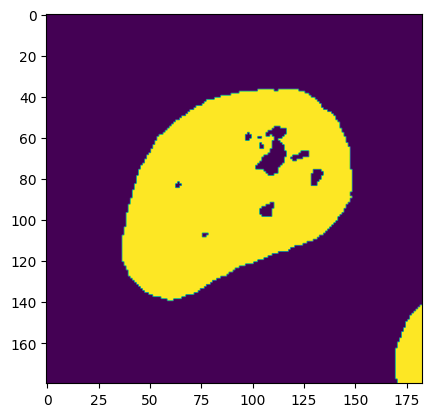

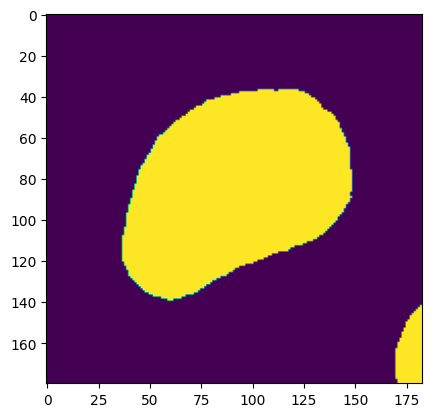

In [ ]:
smooth = filters.gaussian(image_t_0_channel_0, sigma=1.5)

thresh_value = filters.threshold_otsu(smooth)
thresh = smooth > thresh_value

plt.imshow(thresh)
plt.show()

"""
fill = morphology.remove_small_holes(thresh,190)
plt.imshow(fill)
"""

fill = ndi.binary_fill_holes(thresh)
plt.imshow(fill)

bool


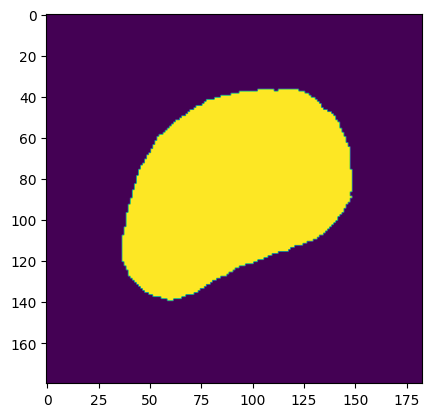

In [ ]:
clear = segmentation.clear_border(fill)
plt.imshow(clear)
print(clear.dtype)

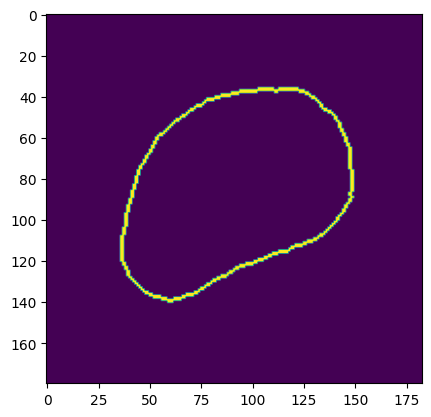

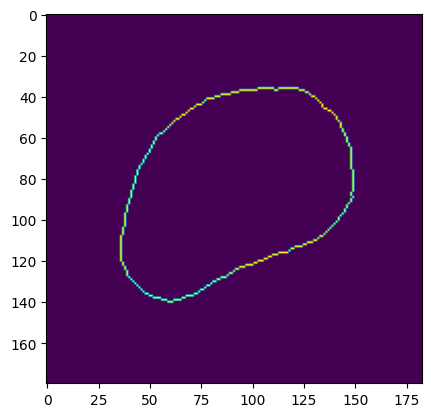

In [ ]:
dilate = morphology.binary_dilation(clear)

erode = morphology.binary_erosion(clear)

mask1 = np.logical_and(dilate, ~erode)
plt.imshow(mask1)
plt.show()

mask2 = np.logical_and(dilate, ~clear)
plt.imshow(mask2)
plt.show()

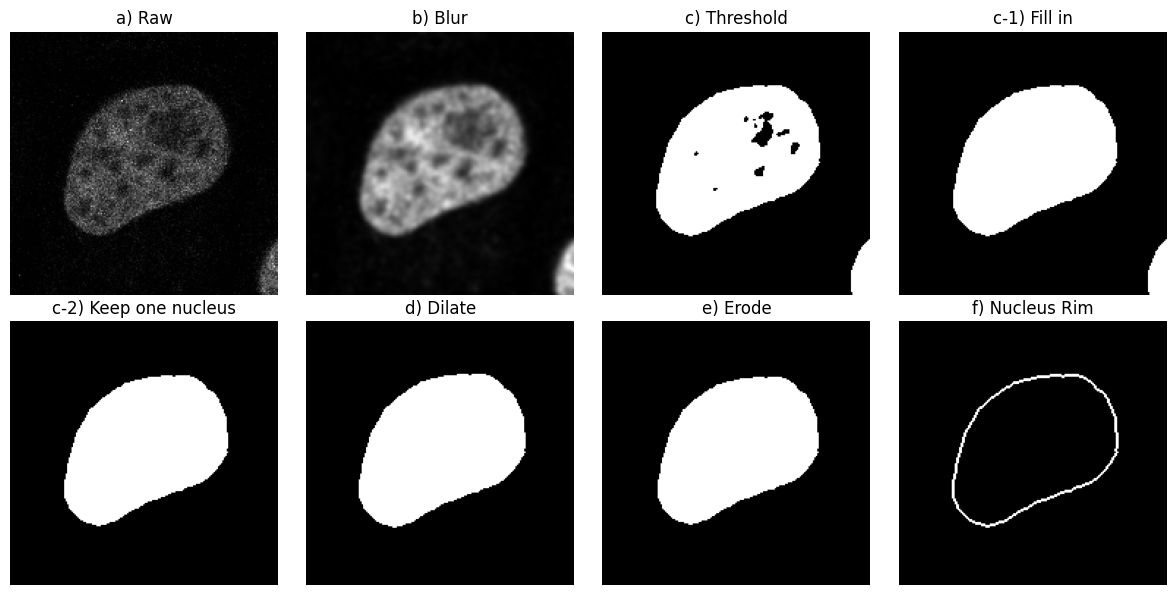

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6), sharey=True)

ax[0, 0].imshow(image_t_0_channel_0, cmap=plt.cm.gray)
ax[0, 0].set_title('a) Raw')

ax[0, 1].imshow(smooth, cmap=plt.cm.gray)
ax[0, 1].set_title('b) Blur')

ax[0, 2].imshow(thresh, cmap=plt.cm.gray)
ax[0, 2].set_title('c) Threshold')

ax[0, 3].imshow(fill, cmap=plt.cm.gray)
ax[0, 3].set_title('c-1) Fill in')

ax[1, 0].imshow(clear, cmap=plt.cm.gray)
ax[1, 0].set_title('c-2) Keep one nucleus')

ax[1, 1].imshow(dilate, cmap=plt.cm.gray)
ax[1, 1].set_title('d) Dilate')

ax[1, 2].imshow(erode, cmap=plt.cm.gray)
ax[1, 2].set_title('e) Erode')

ax[1, 3].imshow(mask, cmap=plt.cm.gray)
ax[1, 3].set_title('f) Nucleus Rim')

for a in ax.ravel():
    a.set_axis_off()

fig.tight_layout()

28350


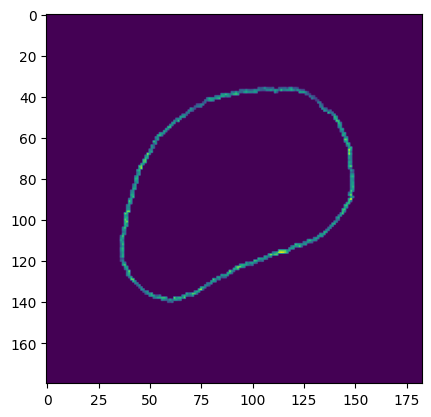

In [ ]:
image_t_0_channel_1 = image_sequence[0, 1, :, :]

test = mask1*image_t_0_channel_1
plt.imshow(test)
print(np.sum(test))

In [ ]:
print(mask1.dtype)

bool


In [ ]:
props = measure.regionprops_table(measure.label(mask1),intensity_image=image_t_0_channel_1,properties=(
    'label','area','intensity_mean'
))

print(props['area']*props['intensity_mean'])

[28350.]
